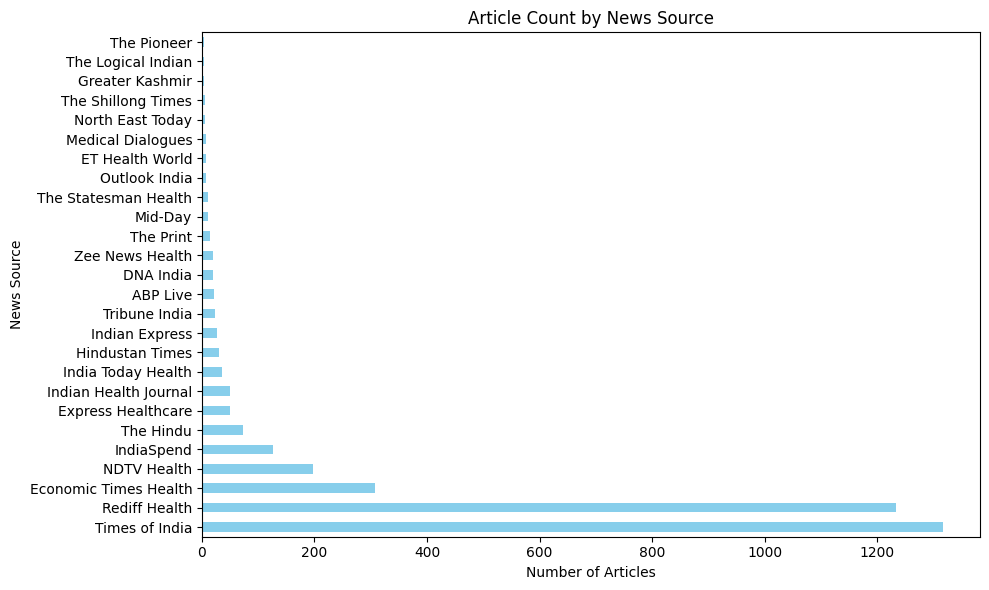

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("preprocessed_health_news_bias.csv")
df['source'].value_counts().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Article Count by News Source")
plt.xlabel("Number of Articles")
plt.ylabel("News Source")
plt.tight_layout()
plt.show()


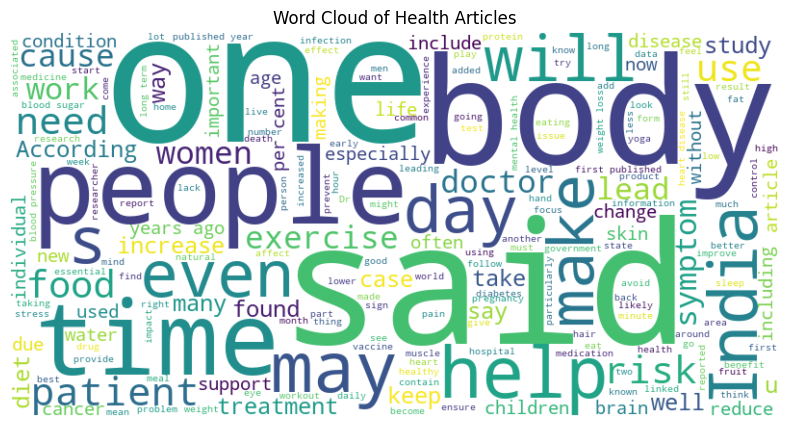

In [3]:
from wordcloud import WordCloud

text = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Health Articles")
plt.show()


Topic Modelling

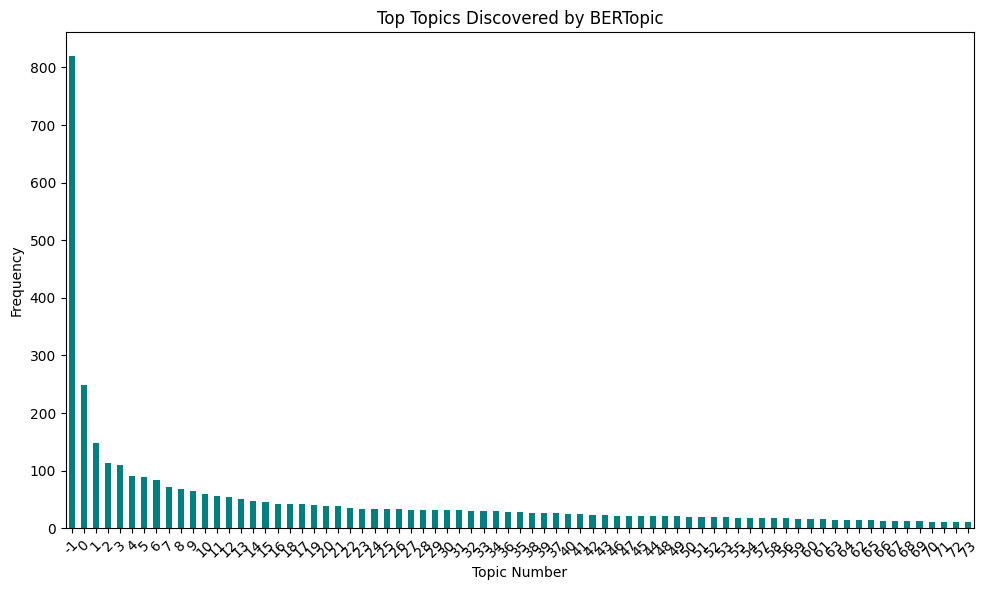

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

topics_df = pd.read_csv("topic_modeling_output.csv")  # BERTopic output
topic_freq = topics_df['topic'].value_counts().sort_values(ascending=False)

topic_freq.plot(kind='bar', color='teal', figsize=(10,6))
plt.title("Top Topics Discovered by BERTopic")
plt.xlabel("Topic Number")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bias Detection

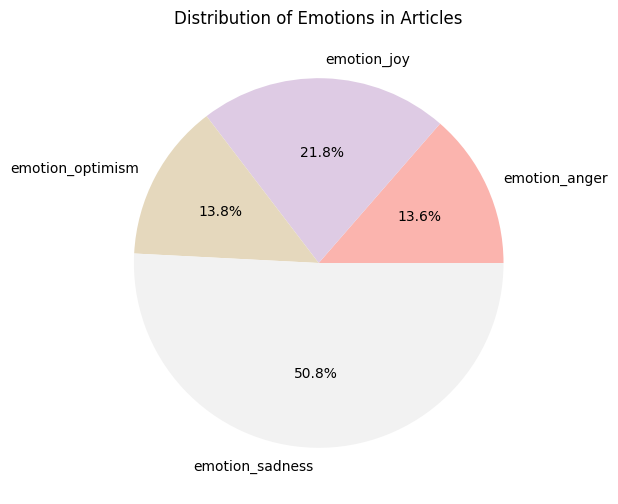

In [7]:
bias_df = pd.read_csv("framing_emotion_output.csv")

# Sum up values for each emotion column
emotion_sums = bias_df[['emotion_anger', 'emotion_joy', 'emotion_optimism', 'emotion_sadness']].sum()

# Plot the distribution as a pie chart
emotion_sums.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colormap='Pastel1')
plt.title("Distribution of Emotions in Articles")
plt.ylabel('')
plt.show()

In [8]:
bias_df['framing'].value_counts().plot(kind='bar', color='salmon', figsize=(8,5))
plt.title("Types of Framing in Articles")
plt.xlabel("Framing Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'framing'

misinformation detecton model

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Replace `true_labels` and `preds` with your arrays
acc = accuracy_score(test_labels, preds)
print(f"Accuracy: {acc:.2f}")

cm = confusion_matrix(test_labels, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Misinformation Classifier")
plt.tight_layout()
plt.show()


NameError: name 'test_labels' is not defined

Timeline of emotion over time

In [10]:
bias_df['date'] = pd.to_datetime(bias_df['date'], errors='coerce')
emotion_timeline = bias_df.groupby([bias_df['date'].dt.to_period("M"), 'emotion']).size().unstack().fillna(0)

emotion_timeline.plot(figsize=(12,6), colormap='tab10')
plt.title("Emotion Trends in Health News Over Time")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


KeyError: 'date'